# Setup

In [472]:
# Import Dependencies
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [473]:
# Read data from csv
full_df = pd.read_csv("full_df.csv")

In [474]:
# Display full_df
full_df.head(10)

,CBSA,CBSA Code,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,"Aberdeen, SD",10100,2012,123,104,19,0,0,0,0,77,53,28,0,0,0,109,14
1,"Aberdeen, WA",10140,2012,366,348,18,0,0,0,0,81,42,20,0,0,0,366,0
2,"Adjuntas, PR",10260,2012,77,74,3,0,0,0,0,66,36,18,0,0,0,77,0
3,"Adrian, MI",10300,2012,243,142,76,21,4,0,0,187,101,48,0,0,174,69,0
4,"Akron, OH",10420,2012,366,186,173,6,1,0,0,164,78,50,81,0,98,187,0
5,"Albany, GA",10500,2012,360,254,104,2,0,0,0,124,63,38,0,0,0,359,1
6,"Albany, OR",10540,2012,366,319,47,0,0,0,0,91,53,23,0,0,0,366,0
7,"Albany-Schenectady-Troy, NY",10580,2012,366,294,64,8,0,0,0,143,60,39,1,0,272,93,0
8,"Albuquerque, NM",10740,2012,366,100,241,23,1,1,0,291,96,60,0,2,228,105,31
9,"Alexandria, LA",10780,2012,362,177,185,0,0,0,0,88,66,52,0,0,0,362,0


In [475]:
#check types
full_df.dtypes

CBSA                                   object
CBSA Code                               int64
Year                                    int64
Days with AQI                           int64
Good Days                               int64
Moderate Days                           int64
Unhealthy for Sensitive Groups Days     int64
Unhealthy Days                          int64
Very Unhealthy Days                     int64
Hazardous Days                          int64
Max AQI                                 int64
90th Percentile AQI                     int64
Median AQI                              int64
Days CO                                 int64
Days NO2                                int64
Days Ozone                              int64
Days PM2.5                              int64
Days PM10                               int64
dtype: object

In [476]:
# view columns
full_df.columns

Index(['CBSA', 'CBSA Code', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10'],
      dtype='object')

In [477]:
# Check Record Count (should = 5680 rows)
len(full_df.index)

5680

#  Top 5 Best and Worst AQI Cities

In [478]:
# Determine Top 5 Worst AQI Cities
Worst_AQI = full_df.groupby("CBSA")["Median AQI"].mean().sort_values(ascending=False)
Worst_AQI.head(5)

CBSA
Riverside-San Bernardino-Ontario, CA    94.909091
Phoenix-Mesa-Scottsdale, AZ             86.000000
Bakersfield, CA                         81.000000
Los Angeles-Long Beach-Anaheim, CA      77.818182
Visalia-Porterville, CA                 77.454545
Name: Median AQI, dtype: float64

In [479]:
# Determine Top 5 Best AQI Cities
Best_AQI = full_df.groupby("CBSA")["Median AQI"].mean().sort_values(ascending=True)
Best_AQI.head(5)

CBSA
Danville, VA       3.000000
Houghton, MI      10.100000
Los Alamos, NM    10.100000
Jamestown, ND     10.333333
Moscow, ID        10.500000
Name: Median AQI, dtype: float64

#  Check Relationship of Variables

In [480]:
# Rename "Median AQI" to "MedianAQI" for better referencing
rename_df = full_df.rename(columns={"Median AQI": "MedianAQI"})
rename_df

,CBSA,CBSA Code,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,MedianAQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,"Aberdeen, SD",10100,2012,123,104,19,0,0,0,0,77,53,28,0,0,0,109,14
1,"Aberdeen, WA",10140,2012,366,348,18,0,0,0,0,81,42,20,0,0,0,366,0
2,"Adjuntas, PR",10260,2012,77,74,3,0,0,0,0,66,36,18,0,0,0,77,0
3,"Adrian, MI",10300,2012,243,142,76,21,4,0,0,187,101,48,0,0,174,69,0
4,"Akron, OH",10420,2012,366,186,173,6,1,0,0,164,78,50,81,0,98,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,"Yakima, WA",49420,2022,212,164,46,2,0,0,0,109,63,29,0,0,0,210,2
5676,"York-Hanover, PA",49620,2022,298,230,67,1,0,0,0,105,61,40,0,57,101,140,0
5677,"Youngstown-Warren-Boardman, OH-PA",49660,2022,243,186,53,4,0,0,0,136,61,43,0,0,183,60,0
5678,"Yuba City, CA",49700,2022,181,116,64,1,0,0,0,102,76,46,0,0,107,74,0


## Top Worst Cities

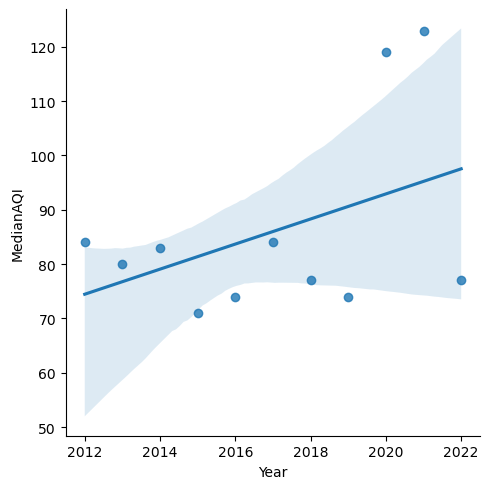

In [481]:
# Check Phoenix-Mesa-Scottsdale, AZ relationship

# Create dataframe to isolate for plt.scatter
PMS_AZ = rename_df.loc[rename_df["CBSA"] == "Phoenix-Mesa-Scottsdale, AZ"]

# Visualize relationship
sns.lmplot(x="Year", y="MedianAQI", data=PMS_AZ)

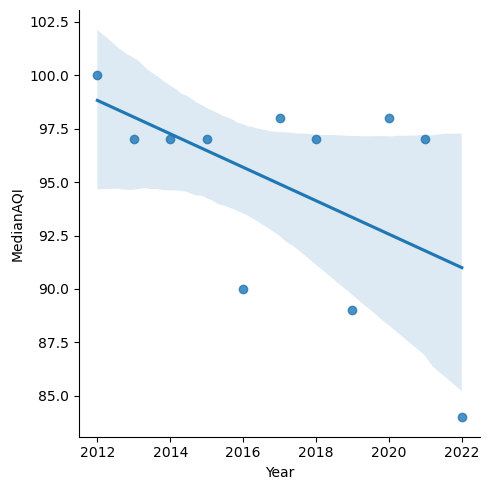

In [482]:
# Check Riverside-San Bernardino-Ontario, CA relationship

# Create dataframe to isolate for plt.scatter
RSBO_CA = rename_df.loc[rename_df["CBSA"] == "Riverside-San Bernardino-Ontario, CA"]

# Visualize relationship
sns.lmplot(x="Year", y="MedianAQI", data=RSBO_CA)

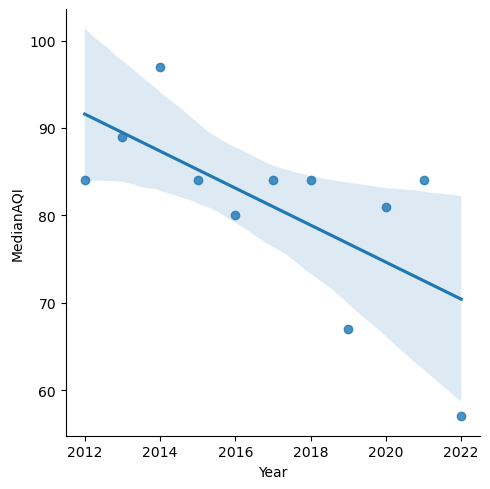

In [483]:
# Check Bakersfield, CA relationship

# Create dataframe to isolate for plt.scatter
B_CA = rename_df.loc[rename_df["CBSA"] == "Bakersfield, CA"]

# Visualize relationship
sns.lmplot(x="Year", y="MedianAQI", data=B_CA)

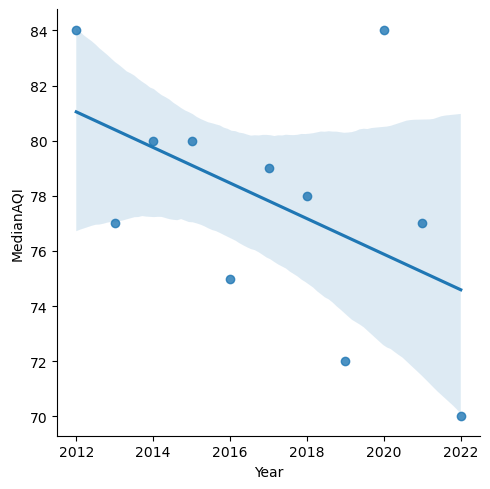

In [484]:
# Check Los Angeles-Long Beach-Anaheim, CA relationship

# Create dataframe to isolate for plt.scatter
LALBA_CA = rename_df.loc[rename_df["CBSA"] == "Los Angeles-Long Beach-Anaheim, CA"]

# Visualize relationship
sns.lmplot(x="Year", y="MedianAQI", data=LALBA_CA)

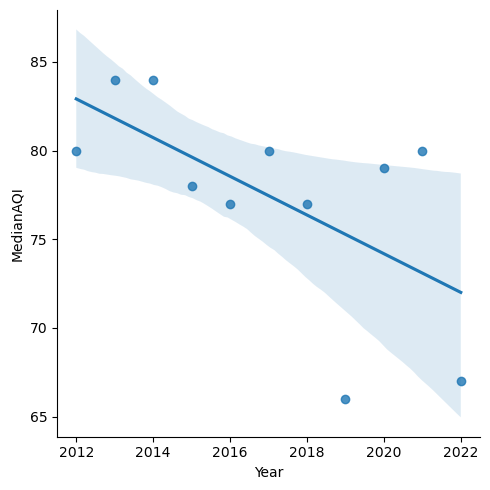

In [485]:
# Check Visalia-Porterville, CA relationship

# Create dataframe to isolate for plt.scatter
VP_CA = rename_df.loc[rename_df["CBSA"] == "Visalia-Porterville, CA"]

# Visualize relationship
sns.lmplot(x="Year", y="MedianAQI", data=VP_CA)

## Top Best Cities

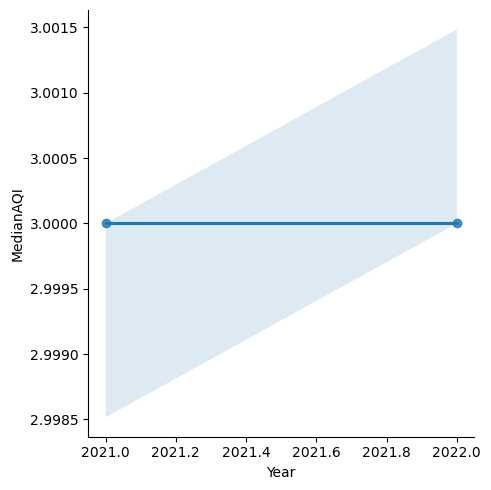

In [486]:
# Check Danville, VA relationship

# Create dataframe to isolate for plt.scatter
D_VA = rename_df.loc[rename_df["CBSA"] == "Danville, VA"]

# Visualize relationship
sns.lmplot(x="Year", y="MedianAQI", data=D_VA)

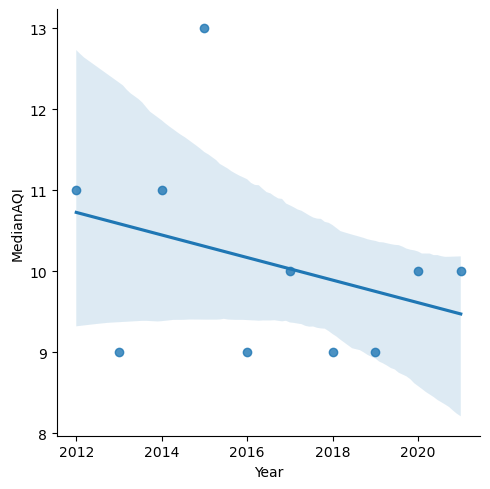

In [487]:
# Check Houghton, MI relationship

# Create dataframe to isolate for plt.scatter
H_MI = rename_df.loc[rename_df["CBSA"] == "Houghton, MI"]

# Visualize relationship
sns.lmplot(x="Year", y="MedianAQI", data=H_MI)

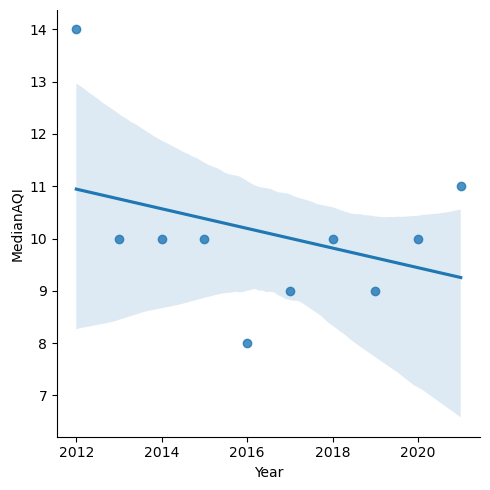

In [488]:
# Check Los Alamos, NM relationship

# Create dataframe to isolate for plt.scatter
LA_NM = rename_df.loc[rename_df["CBSA"] == "Los Alamos, NM"]

# Visualize relationship
sns.lmplot(x="Year", y="MedianAQI", data=LA_NM)

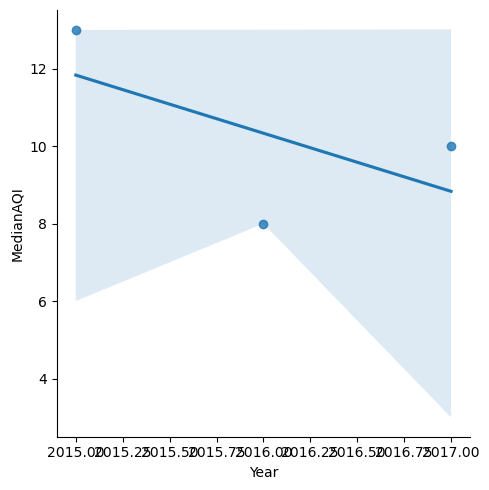

In [489]:
# Check Jamestown, ND relationship

# Create dataframe to isolate for plt.scatter
J_ND = rename_df.loc[rename_df["CBSA"] == "Jamestown, ND"]

# Visualize relationship
sns.lmplot(x="Year", y="MedianAQI", data=J_ND)

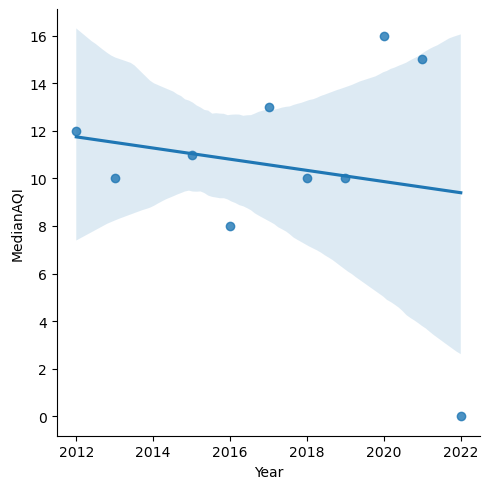

In [490]:
# Check Moscow, ID relationship

# Create dataframe to isolate for plt.scatter
M_ID = rename_df.loc[rename_df["CBSA"] == "Moscow, ID"]

# Visualize relationship
sns.lmplot(x="Year", y="MedianAQI", data=M_ID)

# Machine Learning Model

## Set up MLM

In [492]:
# Data frame for MLM
rename_df.head(3)

,CBSA,CBSA Code,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,MedianAQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,"Aberdeen, SD",10100,2012,123,104,19,0,0,0,0,77,53,28,0,0,0,109,14
1,"Aberdeen, WA",10140,2012,366,348,18,0,0,0,0,81,42,20,0,0,0,366,0
2,"Adjuntas, PR",10260,2012,77,74,3,0,0,0,0,66,36,18,0,0,0,77,0


In [493]:
# Drop outliers from rename_df
rename_df.drop(rename_df[rename_df['CBSA'] =="Laurel, MS"].index,inplace=True)
rename_df.drop(rename_df[rename_df['CBSA'] =="Russellville, AR"].index,inplace=True)
rename_df.drop(rename_df[rename_df['CBSA'] =="Elmira, NY"].index,inplace=True)
rename_df.drop(rename_df[rename_df['CBSA'] =="Breckenridge, CO"].index,inplace=True)
rename_df.drop(rename_df[rename_df['CBSA'] =="Shawnee, OK"].index,inplace=True)
rename_df.drop(rename_df[rename_df['CBSA'] =="Helena-West Helena, AR"].index,inplace=True)
rename_df.drop(rename_df[rename_df['CBSA'] =="Kingston, NY"].index,inplace=True)
rename_df.drop(rename_df[rename_df['CBSA'] =="Vermillion, SD"].index,inplace=True)
rename_df.drop(rename_df[rename_df['CBSA'] =="Cleveland, TN"].index,inplace=True)
rename_df.drop(rename_df[rename_df['CBSA'] =="Ada, OK"].index,inplace=True)

In [494]:
# Check outliers removed (original file length = 5680)
len(rename_df)

5670

In [495]:
# Create CBSA df
AQI_CBSA_df = pd.DataFrame(rename_df["CBSA"])
AQI_CBSA_df

,CBSA
0,"Aberdeen, SD"
1,"Aberdeen, WA"
2,"Adjuntas, PR"
3,"Adrian, MI"
4,"Akron, OH"
...,...
5675,"Yakima, WA"
5676,"York-Hanover, PA"
5677,"Youngstown-Warren-Boardman, OH-PA"
5678,"Yuba City, CA"


In [496]:
# Create one hot encoding for categorial data
AQI_df = pd.get_dummies(rename_df, prefix="city", columns=["CBSA"]).drop(columns=["CBSA Code", "Days with AQI", "Good Days", "Moderate Days", "Unhealthy for Sensitive Groups Days", "Unhealthy Days", "Very Unhealthy Days", "Hazardous Days", "Max AQI", "90th Percentile AQI", "Days CO", "Days NO2", "Days Ozone", "Days PM2.5", "Days PM10"])
AQI_df.head(3)

,Year,MedianAQI,"city_Aberdeen, SD","city_Aberdeen, WA","city_Adjuntas, PR","city_Adrian, MI","city_Akron, OH","city_Albany, GA","city_Albany, OR","city_Albany-Schenectady-Troy, NY",...,"city_Wilmington, OH","city_Winchester, VA-WV","city_Winona, MN","city_Winston-Salem, NC","city_Worcester, MA-CT","city_Yakima, WA","city_York-Hanover, PA","city_Youngstown-Warren-Boardman, OH-PA","city_Yuba City, CA","city_Yuma, AZ"
0,2012,28,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012,20,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,18,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [497]:
# Check df
AQI_df.describe()

,Year,MedianAQI,"city_Aberdeen, SD","city_Aberdeen, WA","city_Adjuntas, PR","city_Adrian, MI","city_Akron, OH","city_Albany, GA","city_Albany, OR","city_Albany-Schenectady-Troy, NY",...,"city_Wilmington, OH","city_Winchester, VA-WV","city_Winona, MN","city_Winston-Salem, NC","city_Worcester, MA-CT","city_Yakima, WA","city_York-Hanover, PA","city_Youngstown-Warren-Boardman, OH-PA","city_Yuba City, CA","city_Yuma, AZ"
count,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,...,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000
mean,2016.953263,38.323986,0.001940,0.001940,0.001764,0.001940,0.001940,0.001940,0.001940,0.001940,...,0.001940,0.001940,0.001764,0.001940,0.001940,0.001940,0.001940,0.001940,0.001940,0.001940
std,3.148038,10.954869,0.044007,0.044007,0.041963,0.044007,0.044007,0.044007,0.044007,0.044007,...,0.044007,0.044007,0.041963,0.044007,0.044007,0.044007,0.044007,0.044007,0.044007,0.044007
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,123.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [498]:
# Check dataframe
AQI_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5670 entries, 0 to 5679
Columns: 546 entries, Year to city_Yuma, AZ
dtypes: int64(2), uint8(544)
memory usage: 3.1 MB


In [499]:
# Break into targets and features (y = what we want to predict given x variables)
X = AQI_df.drop("MedianAQI", axis=1)
y = AQI_df['MedianAQI']

In [500]:
# View y variable
y_df = pd.DataFrame(y)
y_df

,MedianAQI
0,28
1,20
2,18
3,48
4,50
...,...
5675,29
5676,40
5677,43
5678,46


In [501]:
# Check y counts
y.value_counts().tail(15)

81     2
7      2
6      2
89     2
83     1
87     1
75     1
90     1
65     1
69     1
72     1
119    1
100    1
123    1
0      1
Name: MedianAQI, dtype: int64

In [502]:
# View X variables
x_df = pd.DataFrame(X)
x_df

,Year,"city_Aberdeen, SD","city_Aberdeen, WA","city_Adjuntas, PR","city_Adrian, MI","city_Akron, OH","city_Albany, GA","city_Albany, OR","city_Albany-Schenectady-Troy, NY","city_Albuquerque, NM",...,"city_Wilmington, OH","city_Winchester, VA-WV","city_Winona, MN","city_Winston-Salem, NC","city_Worcester, MA-CT","city_Yakima, WA","city_York-Hanover, PA","city_Youngstown-Warren-Boardman, OH-PA","city_Yuba City, CA","city_Yuma, AZ"
0,2012,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5676,2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5677,2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5678,2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Train 

In [503]:
# Import Dependencies
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# X_train
X_train.shape

(4252, 545)

In [504]:
# y_train
y_train.shape

(4252,)

In [505]:
# Train Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [506]:
# Print the coefficients of the model
print('Coefficients: \n', lin_reg.coef_)

Coefficients: 
 [-3.45431197e-01 -1.46085704e+01 -1.84479527e+01 -1.95349357e+01
  2.10139462e+00  4.22929961e+00  3.83868408e-01 -1.37206683e+01
  5.65840064e-02  1.60520473e+01 -4.54432333e+00  7.39229371e+00
  3.64598411e+00  4.38538064e+00 -1.94341599e+00 -7.06040841e-02
 -8.15023709e+00  1.64195149e+00  5.04556995e-01  4.41972926e+00
 -5.75056344e+00  4.57325424e+00  2.15592673e+00 -1.08170389e+01
 -9.02977379e+00  2.94496882e+00  1.56027367e+01 -1.37520499e+00
  5.12880980e+00 -6.26918816e+00  5.90661611e+00  4.22318557e+01
  1.03853806e+01 -5.34432333e+00 -1.14116370e+00 -2.19468926e+00
  4.55204731e+00  1.00176987e+01 -1.21547738e+01 -2.89351230e+00
  5.45204731e+00  1.39294181e+00 -1.40993900e+01 -1.02510414e+01
 -1.66457004e+01 -1.33479527e+01 -2.21258878e+00  5.19490445e+00
 -1.35252371e+01  1.28452262e+01  1.05611564e+01 -3.11589056e-01
  1.04841795e+00  2.83789033e+00  2.93690357e+00  6.30861815e+00
 -1.22145337e+01  7.59750185e+00  7.89852233e+00  2.68296107e+00
 -1.30206

In [507]:
# Coefficients to df for easy viewing
coefficients = pd.DataFrame(lin_reg.coef_)
coefficients

,0
0,-0.345431
1,-14.608570
2,-18.447953
3,-19.534936
4,2.101395
...,...
540,-1.323700
541,5.672823
542,7.647479
543,11.990220


In [508]:
# Match to coefficients of the numbers below
X.iloc[0]

Year                                      2012
city_Aberdeen, SD                            1
city_Aberdeen, WA                            0
city_Adjuntas, PR                            0
city_Adrian, MI                              0
                                          ... 
city_Yakima, WA                              0
city_York-Hanover, PA                        0
city_Youngstown-Warren-Boardman, OH-PA       0
city_Yuba City, CA                           0
city_Yuma, AZ                                0
Name: 0, Length: 545, dtype: int64

## Test Sample Data

In [509]:
# Predict X_test set from data
predictions = lin_reg.predict(X_test)
predictions

array([38.73873851, 25.16129359, 46.01613049, ..., 42.42338663,
       39.84427258, 34.45445466])

In [510]:
len(predictions)

1418

In [511]:
# Check size
y_test.shape

(1418,)

Text(0, 0.5, 'Predicted Y')

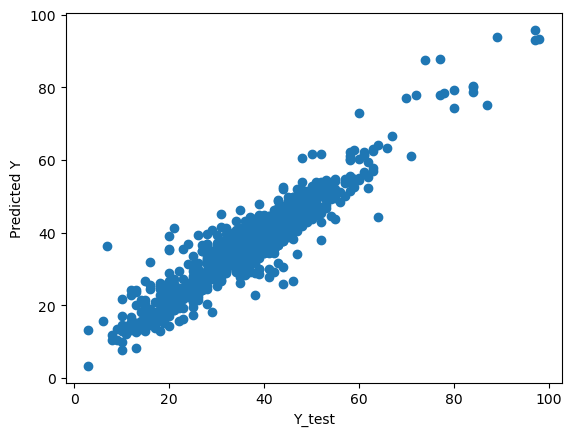

In [512]:
# Real test values versus predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Y_test')
plt.ylabel('Predicted Y')

In [513]:
# Evaluate the model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.7514596844287658
MSE: 15.37042324916946
RMSE: 3.9205131359516527


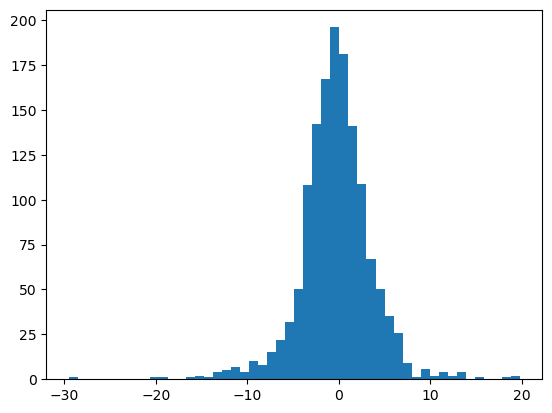

In [514]:
# Check for distribution
plt.hist((y_test-predictions),bins=50);

## Acutal Data Predictions

In [515]:
# Actual predictions
final_predictions = lin_reg.predict(X)
final_predictions

array([25.06653825, 21.22715599, 20.14017302, ..., 43.86827521,
       48.21101649, 43.13467153])

In [516]:
# Visualize predictions
predictions_df = pd.DataFrame(final_predictions)
predictions_df

,0
0,25.066538
1,21.227156
2,20.140173
3,41.776503
4,43.904408
...,...
5665,34.897097
5666,41.893620
5667,43.868275
5668,48.211016


In [560]:
# Add predictions to AQI_df
AQI_df["PredictedAQI"] = final_predictions
AQI_df["CBSA"] = AQI_CBSA_df
AQI_df

,Year,MedianAQI,"city_Aberdeen, SD","city_Aberdeen, WA","city_Adjuntas, PR","city_Adrian, MI","city_Akron, OH","city_Albany, GA","city_Albany, OR","city_Albany-Schenectady-Troy, NY",...,"city_Winston-Salem, NC","city_Worcester, MA-CT","city_Yakima, WA","city_York-Hanover, PA","city_Youngstown-Warren-Boardman, OH-PA","city_Yuba City, CA","city_Yuma, AZ",Predicted AQI,CBSA,PredictedAQI
0,2012,28,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25.066538,"Aberdeen, SD",25.066538
1,2012,20,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21.227156,"Aberdeen, WA",21.227156
2,2012,18,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,20.140173,"Adjuntas, PR",20.140173
3,2012,48,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,41.776503,"Adrian, MI",41.776503
4,2012,50,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,43.904408,"Akron, OH",43.904408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,2022,29,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,34.897097,"Yakima, WA",34.897097
5676,2022,40,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,41.893620,"York-Hanover, PA",41.893620
5677,2022,43,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,43.868275,"Youngstown-Warren-Boardman, OH-PA",43.868275
5678,2022,46,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,48.211016,"Yuba City, CA",48.211016


In [561]:
# Create final df
Predicted_AQI = AQI_df[["Year","CBSA","MedianAQI", "PredictedAQI"]]
Predicted_AQI

,Year,CBSA,MedianAQI,PredictedAQI
0,2012,"Aberdeen, SD",28,25.066538
1,2012,"Aberdeen, WA",20,21.227156
2,2012,"Adjuntas, PR",18,20.140173
3,2012,"Adrian, MI",48,41.776503
4,2012,"Akron, OH",50,43.904408
...,...,...,...,...
5675,2022,"Yakima, WA",29,34.897097
5676,2022,"York-Hanover, PA",40,41.893620
5677,2022,"Youngstown-Warren-Boardman, OH-PA",43,43.868275
5678,2022,"Yuba City, CA",46,48.211016


In [568]:
# If prediction is equal to median
Prediction_Equal = Predicted_AQI[Predicted_AQI.MedianAQI == Predicted_AQI.PredictedAQI].count()
Prediction_Equal

Year            0
CBSA            0
MedianAQI       0
PredictedAQI    0
dtype: int64

In [570]:
# If prediction is higher than median
Prediction_Higher = Predicted_AQI[Predicted_AQI.MedianAQI < Predicted_AQI.PredictedAQI].count()
Prediction_Higher

Year            2948
CBSA            2948
MedianAQI       2948
PredictedAQI    2948
dtype: int64

In [571]:
# If prediction is lower than median
Prediction_Lower = Predicted_AQI[Predicted_AQI.MedianAQI > Predicted_AQI.PredictedAQI].count()
Prediction_Lower

Year            2722
CBSA            2722
MedianAQI       2722
PredictedAQI    2722
dtype: int64

## Predict Top 5 Best and Worst Cities AQI

### Top 5 Worst Cities Prediction

In [75]:
# Predict bakersfield, CA
Bakersfield = Predicted_AQI.loc[Predicted_AQI["CBSA"]=='Bakersfield, CA']
x1 = Bakersfield['Year']
y1= Bakersfield['MedianAQI']
y2= Bakersfield['PredictedAQI']
Bakersfield

,Year,CBSA,MedianAQI,PredictedAQI
30,2012,"Bakersfield, CA",84,81.906964
554,2013,"Bakersfield, CA",89,81.561533
1079,2014,"Bakersfield, CA",97,81.216102
1601,2015,"Bakersfield, CA",84,80.870671
2126,2016,"Bakersfield, CA",80,80.525240
2648,2017,"Bakersfield, CA",84,80.179808
3170,2018,"Bakersfield, CA",84,79.834377
3687,2019,"Bakersfield, CA",67,79.488946
4203,2020,"Bakersfield, CA",81,79.143515
4707,2021,"Bakersfield, CA",84,78.798084


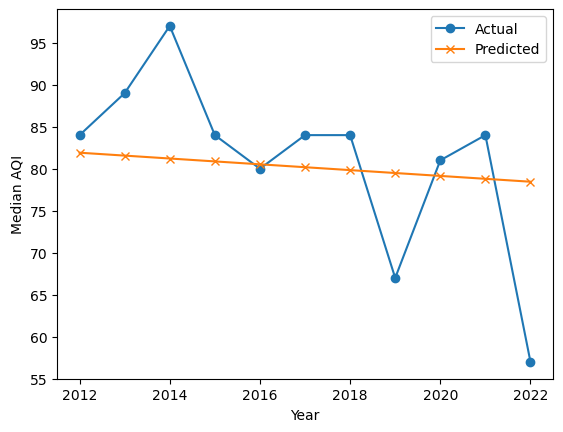

In [94]:
# visualize bakersfield
plt.plot(x1, y1, marker="o")
plt.plot(x1,y2, marker="x")
plt.legend(["Actual","Predicted"])
plt.xlabel("Year")
plt.ylabel("Median AQI")
#plt.plot(x1, y1, y2 )
plt.show()

In [95]:
# Predict Riverside
Riverside= Predicted_AQI.loc[Predicted_AQI["CBSA"]=='Riverside-San Bernardino-Ontario, CA'].sort_values(['Year'])
x1 = Riverside['Year']
y1= Riverside['MedianAQI']
y2= Riverside['PredictedAQI']
Riverside

,Year,CBSA,MedianAQI,PredictedAQI
391,2012,"Riverside-San Bernardino-Ontario, CA",100,96.194705
913,2013,"Riverside-San Bernardino-Ontario, CA",97,95.849274
1437,2014,"Riverside-San Bernardino-Ontario, CA",97,95.503843
1962,2015,"Riverside-San Bernardino-Ontario, CA",97,95.158412
2485,2016,"Riverside-San Bernardino-Ontario, CA",90,94.812980
3007,2017,"Riverside-San Bernardino-Ontario, CA",98,94.467549
3526,2018,"Riverside-San Bernardino-Ontario, CA",97,94.122118
4042,2019,"Riverside-San Bernardino-Ontario, CA",89,93.776687
4552,2020,"Riverside-San Bernardino-Ontario, CA",98,93.431256
5058,2021,"Riverside-San Bernardino-Ontario, CA",97,93.085824


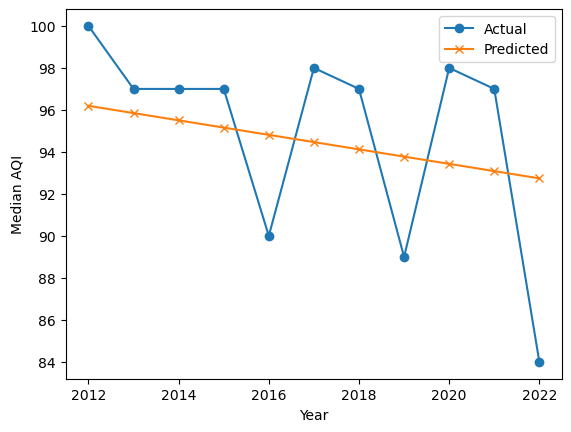

In [96]:
# visualize Riverside
plt.plot(x1, y1, marker="o")
plt.plot(x1,y2, marker="x")
plt.legend(["Actual","Predicted"])
plt.xlabel("Year")
plt.ylabel("Median AQI")
#plt.plot(x1, y1, y2 )
plt.show()

In [97]:
# predict Phoenix
Phoenix = Predicted_AQI.loc[Predicted_AQI["CBSA"]=='Phoenix-Mesa-Scottsdale, AZ'].sort_values(['Year'])
x1 = Phoenix['Year']
y1= Phoenix['MedianAQI']
y2= Phoenix['PredictedAQI']
Phoenix

,Year,CBSA,MedianAQI,PredictedAQI
361,2012,"Phoenix-Mesa-Scottsdale, AZ",84,89.945346
883,2013,"Phoenix-Mesa-Scottsdale, AZ",80,89.599914
1408,2014,"Phoenix-Mesa-Scottsdale, AZ",83,89.254483
1931,2015,"Phoenix-Mesa-Scottsdale, AZ",71,88.909052
2454,2016,"Phoenix-Mesa-Scottsdale, AZ",74,88.563621
2976,2017,"Phoenix-Mesa-Scottsdale, AZ",84,88.218190
3496,2018,"Phoenix-Mesa-Scottsdale, AZ",77,87.872758
4012,2019,"Phoenix-Mesa-Scottsdale, AZ",74,87.527327
4522,2020,"Phoenix-Mesa-Scottsdale, AZ",119,87.181896
5028,2021,"Phoenix-Mesa-Scottsdale, AZ",123,86.836465


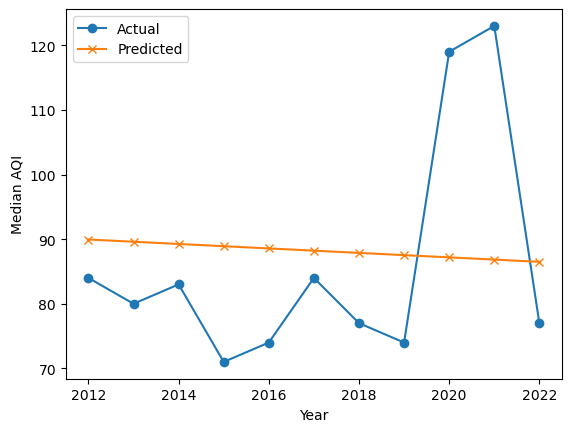

In [98]:
#visualize phoenix
plt.plot(x1, y1, marker="o")
plt.plot(x1,y2, marker="x")
plt.legend(["Actual","Predicted"])
plt.xlabel("Year")
plt.ylabel("Median AQI")
#plt.plot(x1, y1, y2 )
plt.show()

In [99]:
# predict LA, California
LA = Predicted_AQI.loc[Predicted_AQI["CBSA"]=='Los Angeles-Long Beach-Anaheim, CA'].sort_values(['Year'])
x1 = LA['Year']
y1= LA['MedianAQI']
y2= LA['PredictedAQI']
LA

,Year,CBSA,MedianAQI,PredictedAQI
279,2012,"Los Angeles-Long Beach-Anaheim, CA",84,80.436257
801,2013,"Los Angeles-Long Beach-Anaheim, CA",77,80.090826
1328,2014,"Los Angeles-Long Beach-Anaheim, CA",80,79.745395
1853,2015,"Los Angeles-Long Beach-Anaheim, CA",80,79.399963
2374,2016,"Los Angeles-Long Beach-Anaheim, CA",75,79.054532
2895,2017,"Los Angeles-Long Beach-Anaheim, CA",79,78.709101
3416,2018,"Los Angeles-Long Beach-Anaheim, CA",78,78.363670
3931,2019,"Los Angeles-Long Beach-Anaheim, CA",72,78.018239
4443,2020,"Los Angeles-Long Beach-Anaheim, CA",84,77.672807
4949,2021,"Los Angeles-Long Beach-Anaheim, CA",77,77.327376


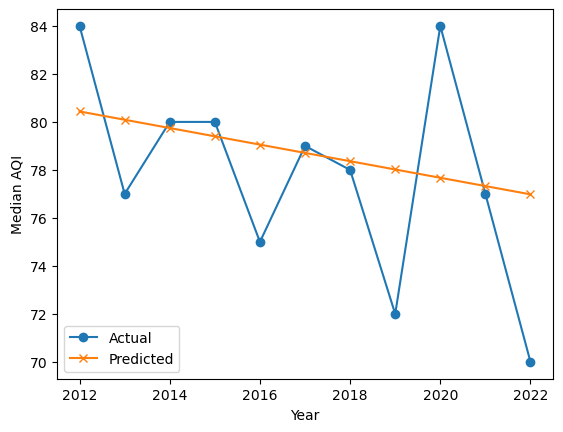

In [100]:
# visualize LA
plt.plot(x1, y1, marker="o")
plt.plot(x1,y2, marker="x")
plt.legend(["Actual","Predicted"])
plt.xlabel("Year")
plt.ylabel("Median AQI")
#plt.plot(x1, y1, y2 )
plt.show()

In [101]:
# predict porterville, CA
Porterville = Predicted_AQI.loc[Predicted_AQI["CBSA"]=='Visalia-Porterville, CA'].sort_values(['Year'])
x1 = Porterville['Year']
y1= Porterville['MedianAQI']
y2= Porterville['PredictedAQI']
Porterville

,Year,CBSA,MedianAQI,PredictedAQI
493,2012,"Visalia-Porterville, CA",80,79.179666
1017,2013,"Visalia-Porterville, CA",84,78.834234
1539,2014,"Visalia-Porterville, CA",84,78.488803
2064,2015,"Visalia-Porterville, CA",78,78.143372
2587,2016,"Visalia-Porterville, CA",77,77.797941
3109,2017,"Visalia-Porterville, CA",80,77.452510
3626,2018,"Visalia-Porterville, CA",77,77.107078
4142,2019,"Visalia-Porterville, CA",66,76.761647
4649,2020,"Visalia-Porterville, CA",79,76.416216
5155,2021,"Visalia-Porterville, CA",80,76.070785


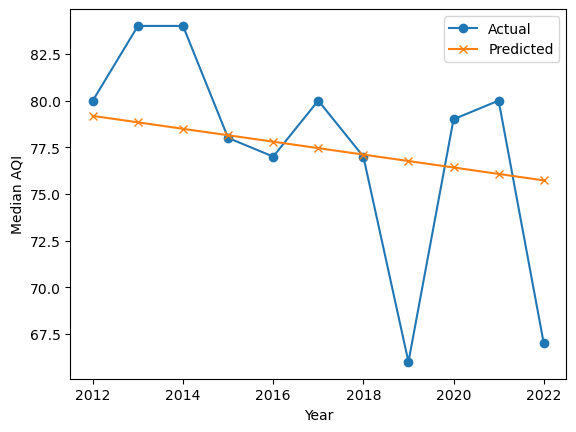

In [102]:
#visualize porterville
plt.plot(x1, y1, marker="o")
plt.plot(x1,y2, marker="x")
plt.legend(["Actual","Predicted"])
plt.xlabel("Year")
plt.ylabel("Median AQI")
#plt.plot(x1, y1, y2 )
plt.show()

In [103]:
# predict moscow
Moscow = Predicted_AQI.loc[Predicted_AQI["CBSA"]=='Moscow, ID'].sort_values(['Year'])
x1 = Moscow['Year']
y1= Moscow['MedianAQI']
y2= Moscow['PredictedAQI']
Moscow

,Year,CBSA,MedianAQI,PredictedAQI
319,2012,"Moscow, ID",12,13.257401
841,2013,"Moscow, ID",10,12.911969
1889,2015,"Moscow, ID",11,12.221107
2411,2016,"Moscow, ID",8,11.875676
2933,2017,"Moscow, ID",13,11.530245
3453,2018,"Moscow, ID",10,11.184813
3969,2019,"Moscow, ID",10,10.839382
4480,2020,"Moscow, ID",16,10.493951
4986,2021,"Moscow, ID",15,10.148520
5486,2022,"Moscow, ID",0,9.803089


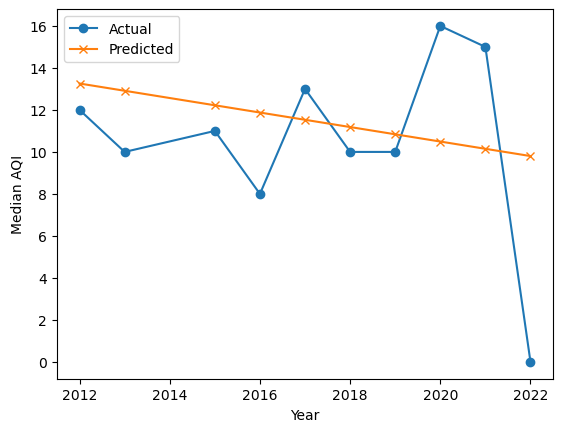

In [104]:
# Visualize Moscow
plt.plot(x1, y1, marker="o")
plt.plot(x1,y2, marker="x")
plt.legend(["Actual","Predicted"])
plt.xlabel("Year")
plt.ylabel("Median AQI")
#plt.plot(x1, y1, y2 )
plt.show()

In [105]:
# predict jamestown
Jamestown = Predicted_AQI.loc[Predicted_AQI["CBSA"]=='Jamestown, ND'].sort_values(['Year'])
x1 = Jamestown['Year']
y1= Jamestown['MedianAQI']
y2= Jamestown['PredictedAQI']
Jamestown

,Year,CBSA,MedianAQI,PredictedAQI
1802,2015,"Jamestown, ND",13,8.345431
2323,2016,"Jamestown, ND",8,8.000000
2845,2017,"Jamestown, ND",10,7.654569


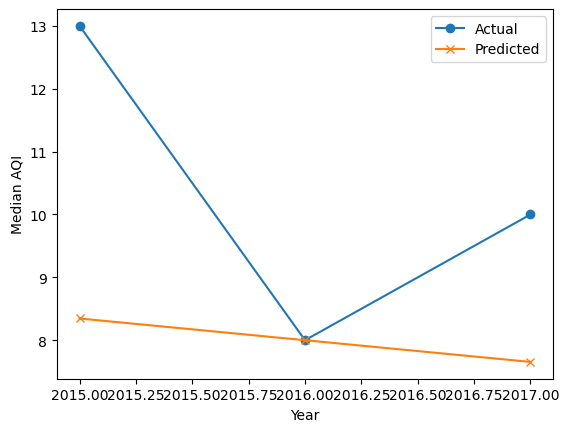

In [106]:
# visualize jamestown
plt.plot(x1, y1, marker="o")
plt.plot(x1,y2, marker="x")
plt.legend(["Actual","Predicted"])
plt.xlabel("Year")
plt.ylabel("Median AQI")
#plt.plot(x1, y1, y2 )
plt.show()

In [107]:
# predict new mexico
New_Mexico = Predicted_AQI.loc[Predicted_AQI["CBSA"]=='Los Alamos, NM'].sort_values(['Year'])
x1 = New_Mexico['Year']
y1= New_Mexico['MedianAQI']
y2= New_Mexico['PredictedAQI']
New_Mexico

,Year,CBSA,MedianAQI,PredictedAQI
278,2012,"Los Alamos, NM",14,11.886261
800,2013,"Los Alamos, NM",10,11.540830
1327,2014,"Los Alamos, NM",10,11.195399
1852,2015,"Los Alamos, NM",10,10.849968
2373,2016,"Los Alamos, NM",8,10.504537
2894,2017,"Los Alamos, NM",9,10.159106
3415,2018,"Los Alamos, NM",10,9.813674
3930,2019,"Los Alamos, NM",9,9.468243
4442,2020,"Los Alamos, NM",10,9.122812
4948,2021,"Los Alamos, NM",11,8.777381


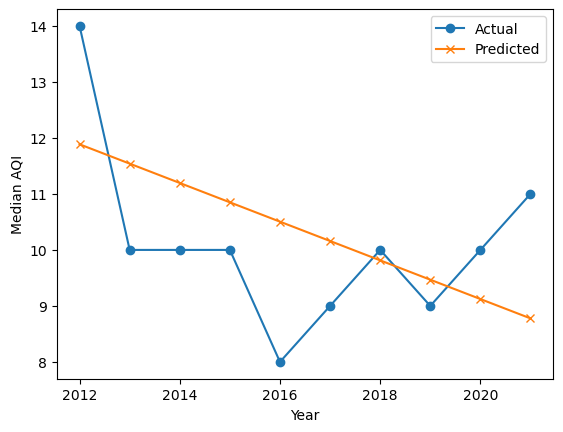

In [108]:
# visualize new mexico
plt.plot(x1, y1, marker="o")
plt.plot(x1,y2, marker="x")
plt.legend(["Actual","Predicted"])
plt.xlabel("Year")
plt.ylabel("Median AQI")
#plt.plot(x1, y1, y2 )
plt.show()

In [109]:
# Predict Houghton
Houghton = Predicted_AQI.loc[Predicted_AQI["CBSA"]=='Houghton, MI'].sort_values(['Year'])
x1 = Houghton['Year']
y1= Houghton['MedianAQI']
y2= Houghton['PredictedAQI']
Houghton

,Year,CBSA,MedianAQI,PredictedAQI
213,2012,"Houghton, MI",11,11.795853
737,2013,"Houghton, MI",9,11.450422
1263,2014,"Houghton, MI",11,11.104991
1787,2015,"Houghton, MI",13,10.759560
2308,2016,"Houghton, MI",9,10.414128
2830,2017,"Houghton, MI",10,10.068697
3351,2018,"Houghton, MI",9,9.723266
3866,2019,"Houghton, MI",9,9.377835
4380,2020,"Houghton, MI",10,9.032404
4886,2021,"Houghton, MI",10,8.686972


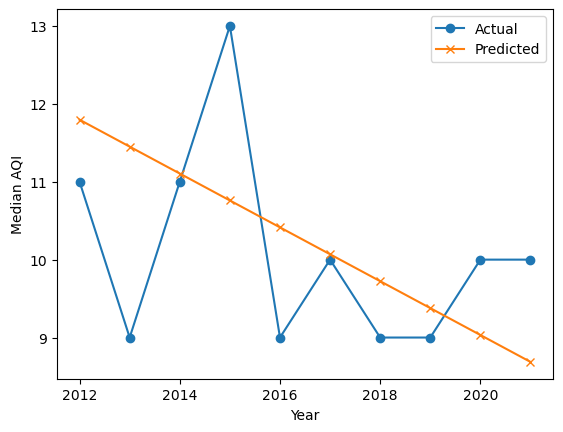

In [110]:
# Visualize Houghton
plt.plot(x1, y1, marker="o")
plt.plot(x1,y2, marker="x")
plt.legend(["Actual","Predicted"])
plt.xlabel("Year")
plt.ylabel("Median AQI")
#plt.plot(x1, y1, y2 )
plt.show()

In [111]:
# predict danville
Danville= Predicted_AQI.loc[Predicted_AQI["CBSA"]=='Danville, VA'].sort_values(['Year'])
x1 = Danville['Year']
y1= Danville['MedianAQI']
y2= Danville['PredictedAQI']
Danville

,Year,CBSA,MedianAQI,PredictedAQI
4793,2021,"Danville, VA",3,3.345431
5296,2022,"Danville, VA",3,3.000000


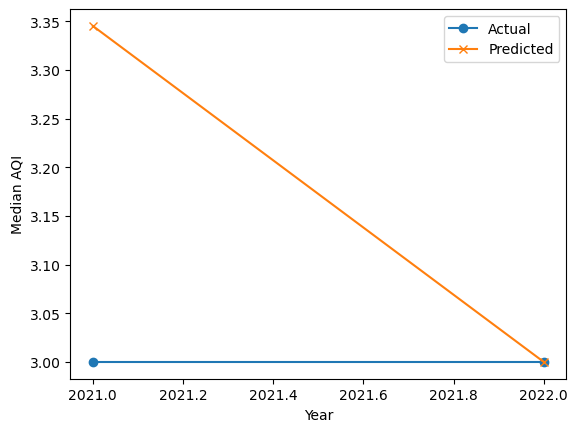

In [112]:
#visualize Danville
plt.plot(x1, y1, marker="o")
plt.plot(x1,y2, marker="x")
plt.legend(["Actual","Predicted"])
plt.xlabel("Year")
plt.ylabel("Median AQI")
#plt.plot(x1, y1, y2 )
plt.show()

# Notes

In [523]:
#Our initial thought was can we predict the following year AQI based simply upon historic Median AQI data. 
#However, we determined that future AQI can not be predicted alone on historic AQI values. 
#There is weak correlation between "Year" and "Median AQI". 
#Therefore, more dependent variables need to be added to improve the predictive accuracy rate of the indepenent variable "Median AQI".

In [ ]:
#Doesn't look like there is much for a linear relationship between the top 5 best and worst CBSA between Years and MedianAQI

#Limitations
# 1. Minimal use of variables. Simply using "Year" as the only dependent variable is limiting. Other research projects use wind trends, movement of pollution, weather conditions, emissions locally and distant, fire potential, etc.
# 2. Only using 11 years of data
# 3. Time limitation. Only having 4 weeks to build, assess, rebuild, produce is limited. More time on project would allow us to do other research studies and build a more indepth study and model.

# Although correlation does not imply causation, the regression model we decided to use estimates a relationship between variables. And if there is no relationship between our limited variables this model will prove inaccurate. 